### Classification

(reference Chapter 4 ISLR)

In [1]:
#basic imports

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

We first load in the Student Default database. See the documentation here: https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/Default


In [5]:
df = pd.read_excel('C:/Users/cutalnaf/Desktop/Data/Default.xlsx')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


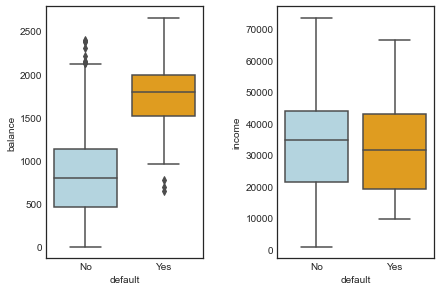

In [6]:
c_palette = {'No':'lightblue', 'Yes':'orange'}

f,(ax1,ax2)=plt.subplots(1,2)
#plt.tight_layout()
plt.tight_layout(pad=1, w_pad=5, h_pad=1.0)
sns.boxplot('default', 'balance', data=df, orient='v',ax=ax1, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v',ax=ax2, palette=c_palette)

In [7]:
#recode the categorical values in default and student columsn to numerals
#by adding the 'default2' and 'student2' columns
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(15)
#verify that No is coded as 0 and Yes = 1

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0
5,6,No,Yes,919.588530,7491.558572,0,1
6,7,No,No,825.513331,24905.226578,0,0
7,8,No,Yes,808.667504,17600.451344,0,1
8,9,No,No,1161.057854,37468.529288,0,0
9,10,No,No,0.000000,29275.268293,0,0


### Logistic Regression (Scikit-Learn)

In [8]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.balance.values.reshape(-1,1)
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549891]]
intercept : [-10.65132237]


### Logistic Regression (Statsmodel)

In [9]:
X_train = sm.add_constant(df.balance)
est = sm.Logit(y, X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [18]:
y = df.default2
X_train = sm.add_constant(df.student2)
est = sm.Logit(y, X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


### Question 

1. Explain the values obtained especially in relation to the Z and p values
2. Obtain the results using student column and explain the results

### Answer
1. Explain the values obtained especially in relation to the Z and p values. 
For the Default data, estimated coefficients of the logistic regression model that predicts the probability of default using balance. A one-unit increase in balance is associated with an increase in the log odds of default by 0.0055 units. 
The p-value associated with balance variable is tiny, we can reject H0. In other words, we conclude that there is indeed an association between balance and probability of default. 

2. Obtain the results using student column and explain the results. 
For the Default data, estimated coefficients of the logistic regression model that predicts the probability of default using student status. Student status is encoded as a dummy variable, with a value of 1 for a student and a value of 0 for a non-student, and represented by the variable student2 in the table.
The coefficient associated with the dummy variable is positive, and the associated p-value is statistically significant. This indicates that
students tend to have higher default probabilities than non-students. 


### Multiple Logistic Regression (Statsmodel)

In [10]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


### Question 
1. Explain the values obtained especially in relation to the Z and p values above.

### Answer
For the Default data, estimated coefficients of the logistic regression model that predicts the probability of default using balance, income, and student status. Student status is encoded as a dummy variable student2, with a value of 1 for a student and a value of 0 for a non-student. In fitting this model, income was measured in thousands of dollars.
The table above shows the coefficient estimates for a logistic regression model that uses balance, income (in thousands of dollars), and student status to predict probability of default. There is a surprising result here. The p values associated with balance and the dummy variable for student status are very small, indicating that each of these variables is associated with the probability of default. However, the coefficient for the dummy variable is negative, indicating that students are less likely to default than non students. 


### Linear Discriminant Analysis


In [11]:
#using scikit-learn
X = df[['balance', 'income', 'student2']].to_numpy()
y = df.default2.to_numpy()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')


True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [12]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



### Question 
The above code uses the entire dataset to perform the fit function (Note: the fit function is where the parameters are learnt). For proper testing and evaluation the training and test data should be separated. Edit the code above so that only training data are used for fit() and predict() uses test data that was not used in training. Print the results out as in the sample above.

1. Comment on the results obtained, i.e. the difference in the results and the reasons for it (pg 145)



### Quadratic Discriminant Analysis

QDA can be performed with code sample as below:
```
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)
```

KNN can be performed with code sample as below:
```
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
```
The output from both can be printed:
```
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))
```

### Question 
Split the dataset into train and test as earlier. Run the QDA and KNN.
1. Compare and comments on the results between LDA,QDA and KNN. 
1. How do we select what K is for KNN? Which K value is best? 




In [21]:
from sklearn.model_selection import train_test_split

x = df[['balance', 'income', 'student2']].to_numpy()
y = df.default2.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


lda = LinearDiscriminantAnalysis(solver='svd')
lda_pred = lda.fit(X_train, y_train).predict(X_test)

df_ = pd.DataFrame({'True default status': y_test, 
                   'Predicted default status': lda_pred})

df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')


True default status,No,Yes
Predicted default status,,
No,1925,58
Yes,6,11


In [36]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda_pred = lda.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1927   68]
 [   4    1]]
              precision    recall  f1-score   support

           0      0.966     0.998     0.982      1931
           1      0.200     0.014     0.027        69

    accuracy                          0.964      2000
   macro avg      0.583     0.506     0.504      2000
weighted avg      0.939     0.964     0.949      2000



In [22]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1922   56]
 [   9   13]]
              precision    recall  f1-score   support

           0      0.972     0.995     0.983      1931
           1      0.591     0.188     0.286        69

    accuracy                          0.968      2000
   macro avg      0.781     0.592     0.635      2000
weighted avg      0.959     0.968     0.959      2000



In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)

In [24]:
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1880   50]
 [  51   19]]
              precision    recall  f1-score   support

           0      0.974     0.974     0.974      1931
           1      0.271     0.275     0.273        69

    accuracy                          0.950      2000
   macro avg      0.623     0.624     0.624      2000
weighted avg      0.950     0.950     0.950      2000



In [25]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1924   61]
 [   7    8]]
              precision    recall  f1-score   support

           0      0.969     0.996     0.983      1931
           1      0.533     0.116     0.190        69

    accuracy                          0.966      2000
   macro avg      0.751     0.556     0.587      2000
weighted avg      0.954     0.966     0.955      2000



In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1915   55]
 [  16   14]]
              precision    recall  f1-score   support

           0      0.972     0.992     0.982      1931
           1      0.467     0.203     0.283        69

    accuracy                          0.965      2000
   macro avg      0.719     0.597     0.632      2000
weighted avg      0.955     0.965     0.958      2000



In [27]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1924   62]
 [   7    7]]
              precision    recall  f1-score   support

           0      0.969     0.996     0.982      1931
           1      0.500     0.101     0.169        69

    accuracy                          0.966      2000
   macro avg      0.734     0.549     0.576      2000
weighted avg      0.953     0.966     0.954      2000



In [28]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1924   57]
 [   7   12]]
              precision    recall  f1-score   support

           0      0.971     0.996     0.984      1931
           1      0.632     0.174     0.273        69

    accuracy                          0.968      2000
   macro avg      0.801     0.585     0.628      2000
weighted avg      0.960     0.968     0.959      2000



In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors=6)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1924   62]
 [   7    7]]
              precision    recall  f1-score   support

           0      0.969     0.996     0.982      1931
           1      0.500     0.101     0.169        69

    accuracy                          0.966      2000
   macro avg      0.734     0.549     0.576      2000
weighted avg      0.953     0.966     0.954      2000



In [30]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1922   62]
 [   9    7]]
              precision    recall  f1-score   support

           0      0.969     0.995     0.982      1931
           1      0.438     0.101     0.165        69

    accuracy                          0.965      2000
   macro avg      0.703     0.548     0.573      2000
weighted avg      0.950     0.965     0.954      2000



In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors=8)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1925   65]
 [   6    4]]
              precision    recall  f1-score   support

           0      0.967     0.997     0.982      1931
           1      0.400     0.058     0.101        69

    accuracy                          0.965      2000
   macro avg      0.684     0.527     0.542      2000
weighted avg      0.948     0.965     0.952      2000



In [32]:
knn = neighbors.KNeighborsClassifier(n_neighbors=9)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1924   63]
 [   7    6]]
              precision    recall  f1-score   support

           0      0.968     0.996     0.982      1931
           1      0.462     0.087     0.146        69

    accuracy                          0.965      2000
   macro avg      0.715     0.542     0.564      2000
weighted avg      0.951     0.965     0.953      2000



In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[1927   68]
 [   4    1]]
              precision    recall  f1-score   support

           0      0.966     0.998     0.982      1931
           1      0.200     0.014     0.027        69

    accuracy                          0.964      2000
   macro avg      0.583     0.506     0.504      2000
weighted avg      0.939     0.964     0.949      2000



### Answer
1. Compare and comments on the results between LDA,QDA and KNN.\
The best results are obtained from QDA with an accuracy value: 0.968 \
However, for LDA and QDA it is not much different. The LDA accuracy value is: 0.964\
For the results given by KNN varies according to the number of Neigbors given, but the results are not much different from LDA and QDA, neighbor 1 has a value of: 0.950

2. How do we select what K is for KNN? Which K value is be.\
There are no pre-defined statistical methods to find the most favorable value of K.
Initialize a random K value and start computing. Choosing a small value of K leads to unstable decision boundaries. The substantial K value is better for classification as it leads to smoothening the decision boundaries. Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.
In this case after tried 1-10 K,  the best result fro K is 5. 